# KHAI BÁO THƯ VIỆN

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
import statsmodels.api as sm

In [3]:
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [51]:
# Đọc hiểu dữ liệu
data = pd.read_csv('COCO COLA.csv',parse_dates=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [5]:
# Thống kê dữ liệu
print (data.describe())
print ("=============================================================")
print (data.dtypes)

                                Date          Open          High  \
count                          15096  15096.000000  15096.000000   
mean   1992-01-04 11:35:29.093799680     16.056202     16.188428   
min              1962-01-02 00:00:00      0.192708      0.193359   
25%              1977-01-26 18:00:00      0.860677      0.869792   
50%              1992-01-02 12:00:00      9.328125      9.398438   
75%              2006-12-20 06:00:00     28.875000     29.167500   
max              2021-12-17 00:00:00     59.810001     60.130001   
std                              NaN     16.939301     17.064336   

                Low         Close     Adj Close        Volume  
count  15096.000000  15096.000000  15096.000000  1.509600e+04  
mean      15.921876     16.060734     11.367487  9.032904e+06  
min        0.182292      0.192057      0.037855  7.680000e+04  
25%        0.854167      0.860352      0.242312  2.812800e+06  
50%        9.218750      9.351562      4.642848  7.585200e+06  
75%

In [6]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,15096,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,1992-01-04 11:35:29.093799680,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
min,1962-01-02 00:00:00,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,1977-01-26 18:00:00,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,1992-01-02 12:00:00,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,2006-12-20 06:00:00,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,2021-12-17 00:00:00,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08
std,NaN,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15096 non-null  datetime64[ns]
 1   Open       15096 non-null  float64       
 2   High       15096 non-null  float64       
 3   Low        15096 non-null  float64       
 4   Close      15096 non-null  float64       
 5   Adj Close  15096 non-null  float64       
 6   Volume     15096 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 825.7 KB


# PREPROCESSING

In [10]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

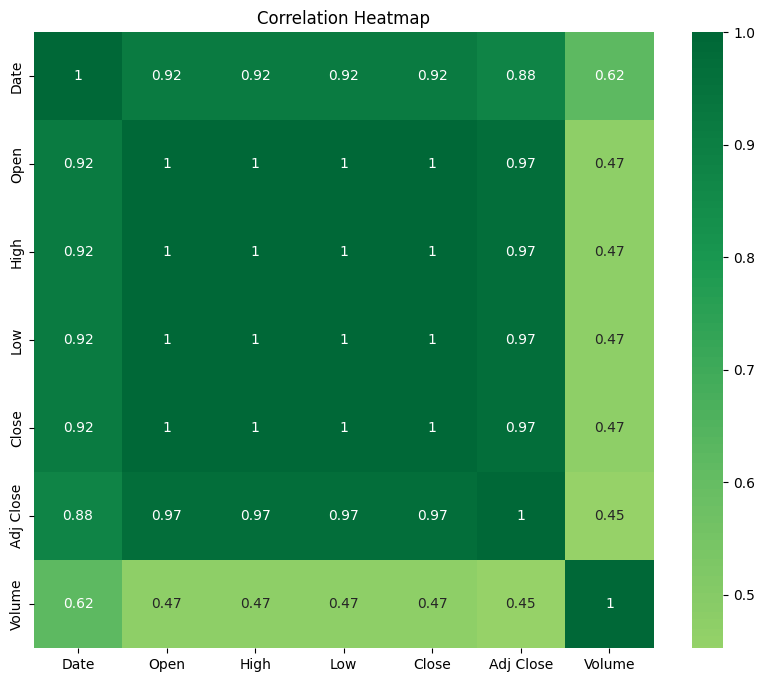

In [11]:
# Tính toán ma trận tương quan
corr_matrix = data.corr()

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0)

# Thiết lập tiêu đề
plt.title('Correlation Heatmap')

# Hiển thị biểu đồ
plt.show()

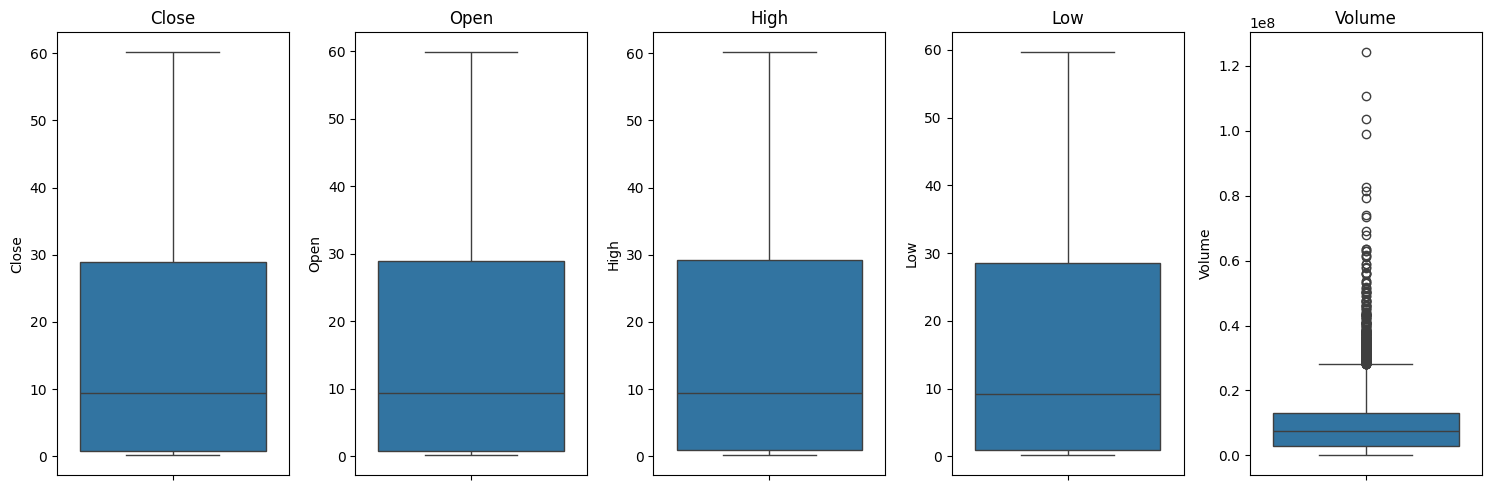

In [12]:
# Chọn các cột cần vẽ biểu đồ boxplot
df = data[['Close', 'Open', 'High', 'Low', 'Volume']]

# Thiết lập cỡ của biểu đồ
plt.figure(figsize=(18, 5))

# Vẽ biểu đồ boxplot cho từng cột
for i, column in enumerate(df.columns, 1):  
    plt.subplot(1, 6, i)
    sns.boxplot(y=df[column])
    plt.title(column)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [13]:
# Hàm để xử lý ngoại lệ dựa trên IQR cho một cột cụ thể
def handle_outliers_iqr(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_limit = df[column].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[column].quantile(0.75) + (IQR * 1.5)

    print(f"Lower limit for {column}: {lower_limit}")
    print(f"Upper limit for {column}: {upper_limit}")

    # Xử lý các giá trị ngoại lệ
    df[column] = np.where(df[column] > upper_limit, upper_limit,
                          np.where(df[column] < lower_limit, lower_limit, df[column]))

# Xử lý ngoại lệ cho cột 'Vol'
handle_outliers_iqr(data, 'Volume')
# Hiển thị dữ liệu sau khi xử lý ngoại lệ
print(data.describe())

Lower limit for Volume: -12337125.0
Upper limit for Volume: 28062675.0
                                Date          Open          High  \
count                          15096  15096.000000  15096.000000   
mean   1992-01-04 11:35:29.093799680     16.056202     16.188428   
min              1962-01-02 00:00:00      0.192708      0.193359   
25%              1977-01-26 18:00:00      0.860677      0.869792   
50%              1992-01-02 12:00:00      9.328125      9.398438   
75%              2006-12-20 06:00:00     28.875000     29.167500   
max              2021-12-17 00:00:00     59.810001     60.130001   
std                              NaN     16.939301     17.064336   

                Low         Close     Adj Close        Volume  
count  15096.000000  15096.000000  15096.000000  1.509600e+04  
mean      15.921876     16.060734     11.367487  8.805738e+06  
min        0.182292      0.192057      0.037855  7.680000e+04  
25%        0.854167      0.860352      0.242312  2.812800e+0

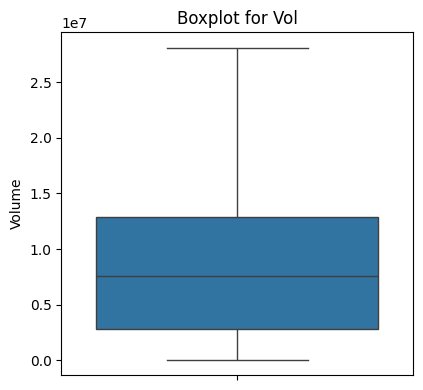

In [14]:
# Vẽ lại boxplot cho hai cột 'Vol' và 'Change%' sau khi xử lý ngoại lệ
plt.figure(figsize=(8, 4))

# Biểu đồ boxplot cho cột 'Vol'
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Volume'])
plt.title('Boxplot for Vol')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# VISUALIZATION

In [16]:
df1 = data[['Date','Close']]
df1.head(3)

,Date,Close
0,1962-01-02,0.263021
1,1962-01-03,0.257161
2,1962-01-04,0.259115


In [17]:
# Setting the Date as Index
df_ts = data.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1962-01-02  0.263021  0.270182  0.263021  0.263021   0.051133   806400.0
1962-01-03  0.259115  0.259115  0.253255  0.257161   0.049994  1574400.0
1962-01-04  0.257813  0.261068  0.257813  0.259115   0.050374   844800.0
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001  24923800.0
2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002  24696900.0
2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000  28062675.0


In [18]:
# hàm kiểm tra tính định của một chuỗi thời gian.
def test_stationarity(timeseries):
     # đánh giá xem liệu chuỗi thời gian có tính định (stationary) hay không
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [19]:
 # DataFrame (DF) thành Series (ts)
ts = df_ts['Close']

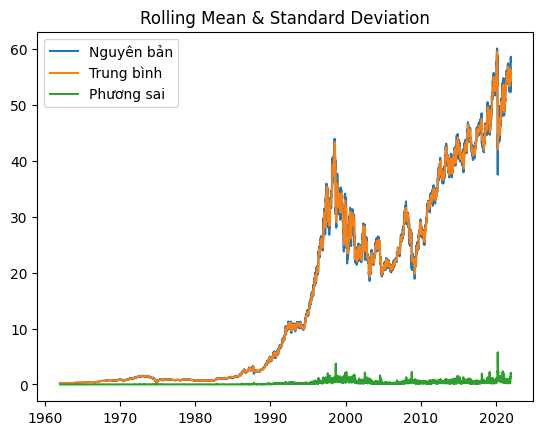

In [20]:
# standard deviation
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Nguyên bản')
plt.plot(rolmean, label='Trung bình')
plt.plot(rolvar, label='Phương sai')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [21]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                     0.527771
p-value                            0.985693
#lags Used                        43.000000
Number of Observations Used    15052.000000
Critical Value (1%)               -3.430785
Critical Value (5%)               -2.861732
Critical Value (10%)              -2.566872
dtype: float64


In [22]:
#  lấy mẫu lại dữ liệu theo tháng và phân tích lại
df_ts_m = df_ts.resample('M').mean()
print (type(df_ts_m))
print (df_ts_m.head(3))

<class 'pandas.core.frame.DataFrame'>
                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
1962-01-31  0.248432  0.250784  0.245221  0.247692   0.048153  1.337018e+06
1962-02-28  0.243695  0.245546  0.241982  0.243318   0.047303  6.952421e+05
1962-03-31  0.245531  0.247203  0.244126  0.245517   0.047930  1.939200e+06


In [23]:
# chọn cột 'Close' từ DataFrame df_ts_m sau khi đã resample theo tháng
tsm = df_ts_m['Close']
print (type(tsm))

<class 'pandas.core.series.Series'>


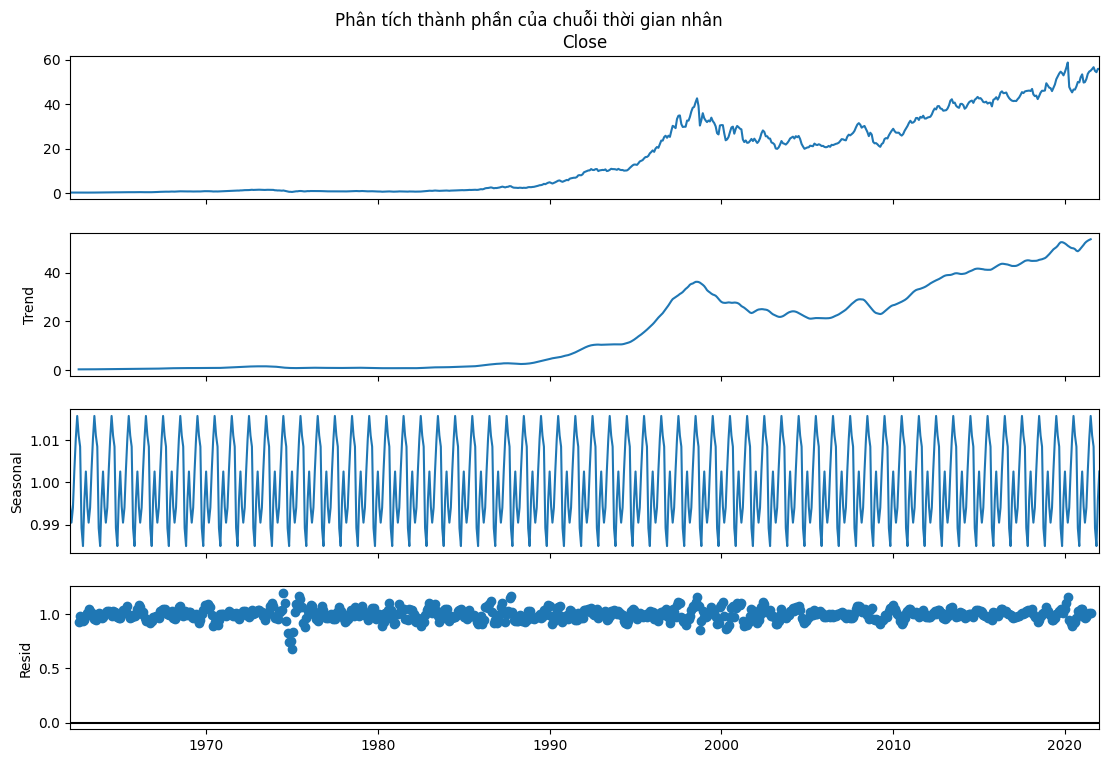

In [24]:
# Biểu đồ phân tích thành phần (decomposition plot)
decomposition = sm.tsa.seasonal_decompose(tsm, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Phân tích thành phần của chuỗi thời gian nhân')
plt.show()

In [25]:
# Chuyển đổi chuỗi thời gian tsm thành biến log để giảm thiểu sự biến động của xu hướng.
tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
# Kiểm tra tính định
test_stationarity(tsmlogdiff)

Results of Dickey-Fuller Test:
Test Statistic                -1.800432e+01
p-value                        2.727719e-30
#lags Used                     1.000000e+00
Number of Observations Used    7.170000e+02
Critical Value (1%)           -3.439503e+00
Critical Value (5%)           -2.865579e+00
Critical Value (10%)          -2.568921e+00
dtype: float64


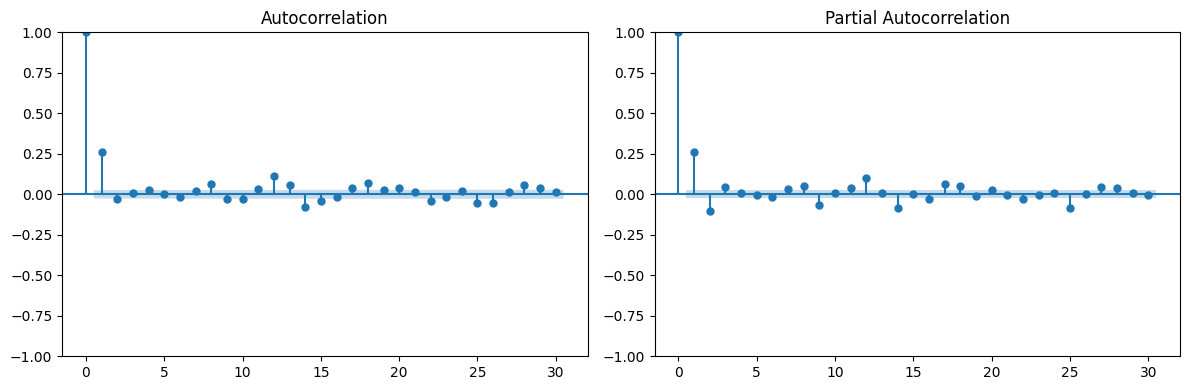

In [26]:
# biểu đồ tự tương quan (ACF)
# biểu đồ tự tương quan riêng phần (PACF)
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()


In [27]:
y_2019 = data.loc[(data['Date'] >= '2019-01-01')
                     & (data['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
14348,2019-01-02,46.939999,47.220001,46.560001,46.930000
14349,2019-01-03,46.820000,47.369999,46.529999,46.639999
14350,2019-01-04,46.750000,47.570000,46.639999,47.570000
14351,2019-01-07,47.570000,47.750000,46.900002,46.950001
14352,2019-01-08,47.250000,47.570000,47.040001,47.480000
...,...,...,...,...,...
14595,2019-12-24,54.799999,55.000000,54.639999,54.709999
14596,2019-12-26,54.919998,55.020000,54.790001,55.020000
14597,2019-12-27,55.009998,55.450001,55.000000,55.349998
14598,2019-12-30,55.180000,55.389999,55.060001,55.270000


In [28]:
#  DataFrame mới có chỉ số là tên của các tháng
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,47.290476,47.355714
February,47.209473,47.171579
March,45.768572,45.824286
April,47.172381,47.219524
May,48.715909,48.770909
June,51.122000,51.154000
July,52.492727,52.460909
August,53.671818,53.722728
September,54.587500,54.554500


In [29]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

In [30]:
# bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Giá mở cổ phiếu',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Giá đóng cổ phiếu',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='So sánh theo tháng giữa giá mở và đóng cổ phiếu')
fig.show()

In [31]:
# Áp dụng MinMaxScaler cho tất cả các cột trong bộ dữ liệu
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Hiển thị dữ liệu đã được chuẩn hóa
print(scaled_data.head())

      Close      Open      High       Low    Volume
0  0.001184  0.001179  0.001282  0.001358  0.005879
1  0.001086  0.001114  0.001097  0.001194  0.012068
2  0.001119  0.001092  0.001130  0.001271  0.006189
3  0.001021  0.001114  0.001151  0.001183  0.010831
4  0.000978  0.000983  0.000967  0.001068  0.015782


In [32]:
# Thêm cột Date vào lại bộ dữ liệu đã chuẩn hóa
scaled_data['Date'] = data['Date']
scaled_data

# Lưu ra file csv mới
scaled_data.to_csv('cocacola_cleaned.csv', index=False)

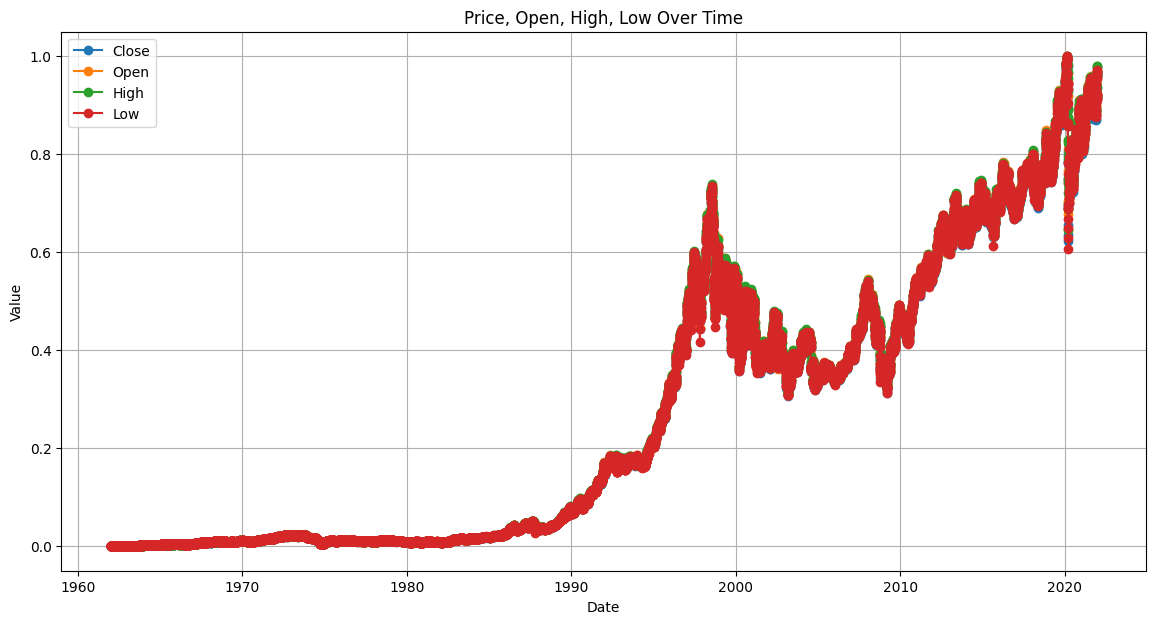

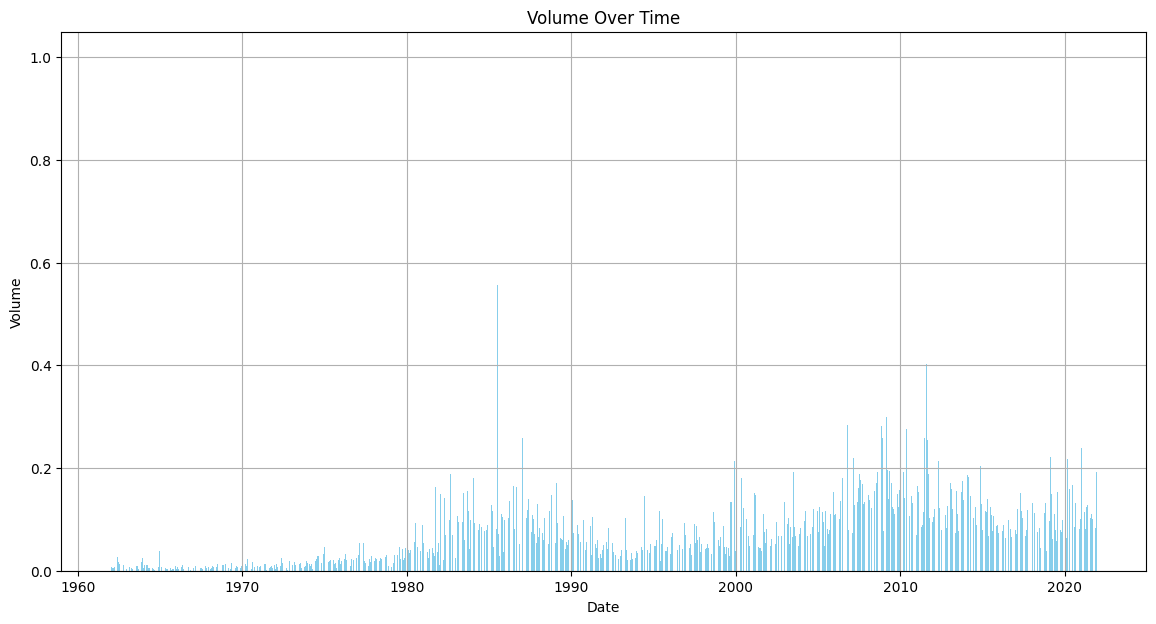

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Chuyển đổi cột 'Date' thành định dạng datetime
scaled_data['Date'] = pd.to_datetime(scaled_data['Date'])

# Thiết lập cột 'Date' làm chỉ số
scaled_data.set_index('Date', inplace=True)

# Biểu đồ đường cho các cột giá
plt.figure(figsize=(14, 7))
plt.plot(scaled_data.index, scaled_data['Close'], label='Close', marker='o')
plt.plot(scaled_data.index, scaled_data['Open'], label='Open', marker='o')
plt.plot(scaled_data.index, scaled_data['High'], label='High', marker='o')
plt.plot(scaled_data.index, scaled_data['Low'], label='Low', marker='o')
plt.title('Price, Open, High, Low Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ thanh cho khối lượng (Vol)
plt.figure(figsize=(14, 7))
plt.bar(scaled_data.index, scaled_data['Volume'], color='skyblue')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()



# TRAINING MODEL

In [34]:
data = pd.read_csv('cocacola_cleaned.csv')
data

,Close,Open,High,Low,Volume,Date
0,0.001184,0.001179,0.001282,0.001358,0.005879,1962-01-02
1,0.001086,0.001114,0.001097,0.001194,0.012068,1962-01-03
2,0.001119,0.001092,0.001130,0.001271,0.006189,1962-01-04
3,0.001021,0.001114,0.001151,0.001183,0.010831,1962-01-05
4,0.000978,0.000983,0.000967,0.001068,0.015782,1962-01-08
...,...,...,...,...,...,...
15091,0.960459,0.952531,0.963295,0.955247,0.252119,2021-12-13
15092,0.961126,0.959576,0.967299,0.962650,0.199286,2021-12-14
15093,0.965464,0.968466,0.968634,0.966856,0.200230,2021-12-15
15094,0.975308,0.969304,0.979145,0.971062,0.198402,2021-12-16


### LSTM

Epoch 1/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0047 - val_loss: 5.3235e-04
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 1.0028e-04 - val_loss: 3.8405e-04
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 9.2644e-05 - val_loss: 2.8430e-04
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 7.2046e-05 - val_loss: 0.0015
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 6.5599e-05 - val_loss: 2.7244e-04
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 7.7903e-05 - val_loss: 3.4803e-04
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 5.7432e-05 - val_loss: 3.7744e-04
Epoch 8/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 5.0792e-05 - val_loss: 2.0147e-04
Epoch 9/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 5.2755e-05 - val_loss: 2.4782e-04
Epoch 10/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 4.0110e-05 - val_loss: 1.0954e-04
Epoch 11/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step -

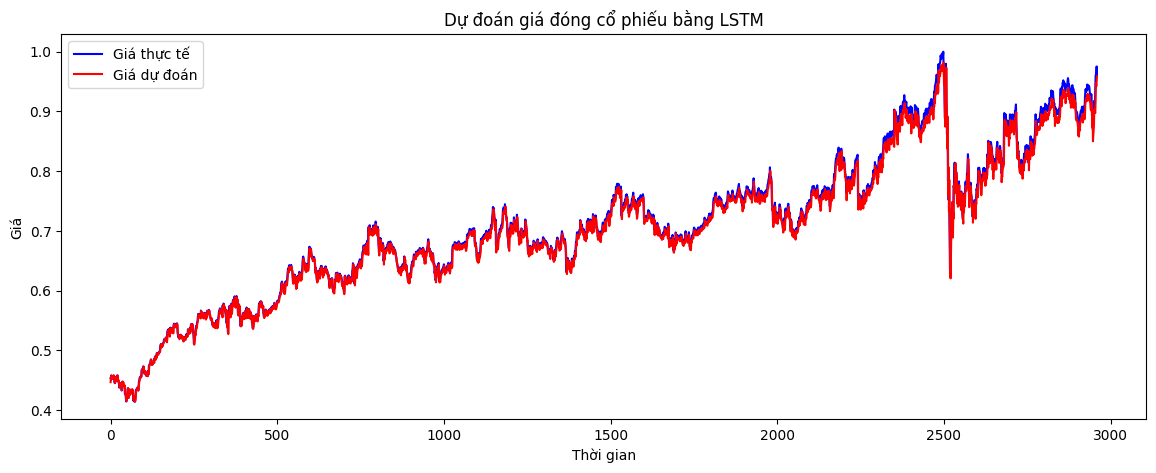

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Chọn cột 'Price' để dự đoán
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Hàm tạo các sequences cho mô hình LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Thiết lập độ dài sequence
seq_length = 60

# Tạo sequences cho tập huấn luyện và tập kiểm tra
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Dự đoán và đánh giá
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình bằng cách vẽ biểu đồ
plt.figure(figsize=(14,5))
plt.plot(real_prices, color='blue', label='Giá thực tế')
plt.plot(predicted_prices, color='red', label='Giá dự đoán')
plt.title('Dự đoán giá đóng cổ phiếu bằng LSTM')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.legend()
plt.show()


ĐỘ ĐO ĐÁNH GIÁ

In [36]:
# R2, RSME, MAE, MSE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def RMSE(real_prices, predicted_prices):
    return np.sqrt(mean_squared_error(real_prices, predicted_prices))

r2_lstm = r2_score(real_prices, predicted_prices)
mse_lstm = mean_squared_error(real_prices, predicted_prices)
mae_lstm = mean_absolute_error(real_prices, predicted_prices)
rmse_lstm = RMSE(real_prices, predicted_prices)

print(f'R2 score: {r2_lstm}')
print(f'MSE: {mse_lstm}')
print(f'MAE: {mae_lstm}')
print(f'RSME: {rmse_lstm}')



R2 score: 0.9929978869073312
MSE: 0.00010097497651031652
MAE: 0.007287188651758669
RSME: 0.010048630578855834


### LINEAR REGRESSION

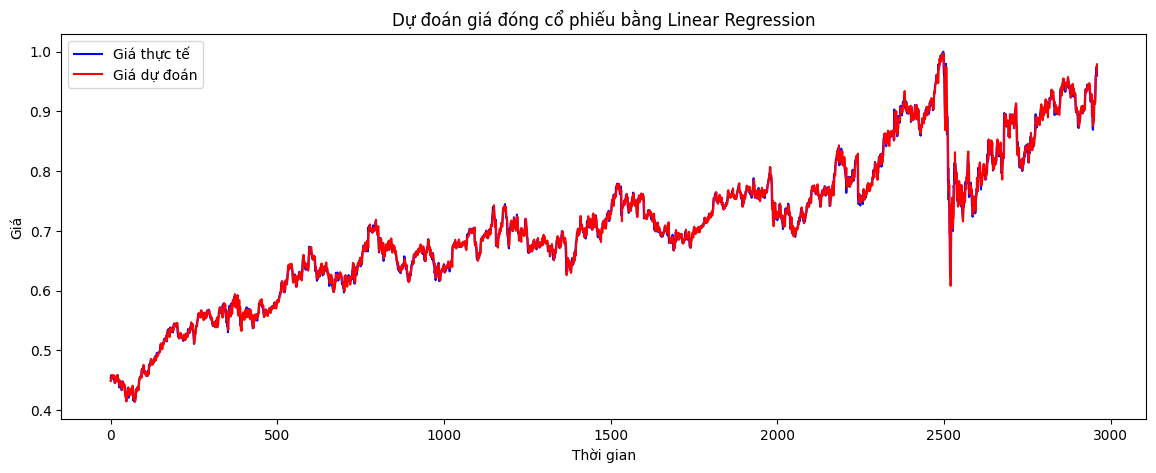

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Chọn các cột features và label
features = data[['Open', 'High', 'Low', 'Volume']].values
label = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_label = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler_features.fit_transform(features)
scaled_label = scaler_label.fit_transform(label)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
test_features = scaled_features[train_size:]
train_label = scaled_label[:train_size]
test_label = scaled_label[train_size:]

# Hàm tạo các sequences cho mô hình hồi quy tuyến tính
def create_sequences(features, label, seq_length):
    X = []
    y = []
    for i in range(len(features) - seq_length):
        X.append(features[i:i+seq_length])
        y.append(label[i+seq_length])
    return np.array(X), np.array(y)

# Thiết lập độ dài sequence
seq_length = 60

# Tạo sequences cho tập huấn luyện và tập kiểm tra
X_train, y_train = create_sequences(train_features, train_label, seq_length)
X_test, y_test = create_sequences(test_features, test_label, seq_length)

# Dàn phẳng các sequences cho Linear Regression
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Xây dựng và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
predicted_prices = model.predict(X_test)
predicted_prices = scaler_label.inverse_transform(predicted_prices)
real_prices = scaler_label.inverse_transform(y_test)



# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(14,5))
plt.plot(real_prices, color='blue', label='Giá thực tế')
plt.plot(predicted_prices, color='red', label='Giá dự đoán')
plt.title('Dự đoán giá đóng cổ phiếu bằng Linear Regression')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.legend()
plt.show()


### ĐÁNH GIÁ MÔ HÌNH

In [38]:
# Tính các độ đo
mae_lr = mean_absolute_error(real_prices, predicted_prices)
mse_lr = mean_squared_error(real_prices, predicted_prices)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(real_prices, predicted_prices)

print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R-squared: {r2_lr}')

MAE: 0.00582632791582431
MSE: 7.507888699602303e-05
RMSE: 0.008664807383665435
R-squared: 0.9947936520929604


XGBOOST

Mean Absolute Error (MAE): 0.0909
Mean Squared Error (MSE): 0.0156
Root Mean Squared Error (RMSE): 0.1250
R-squared (R2): -0.0839



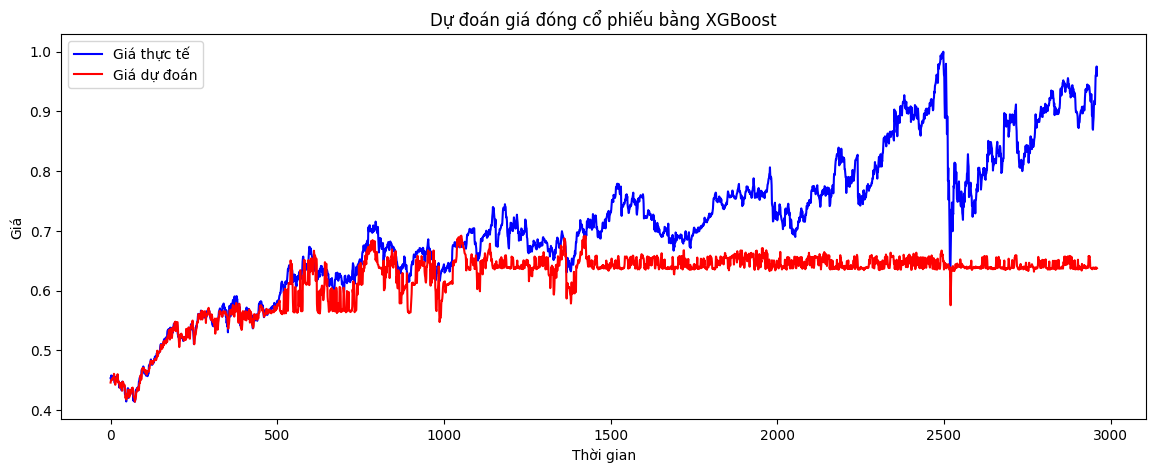

In [47]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Bước 1: Tiền xử lý dữ liệu (tương tự như trên)
features = data[['Open', 'High', 'Low', 'Volume']].values
label = data['Close'].values.reshape(-1, 1)

scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_label = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler_features.fit_transform(features)
scaled_label = scaler_label.fit_transform(label)

train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
test_features = scaled_features[train_size:]
train_label = scaled_label[:train_size]
test_label = scaled_label[train_size:]

def create_sequences(features, label, seq_length):
    X = []
    y = []
    for i in range(len(features) - seq_length):
        X.append(features[i:i+seq_length])
        y.append(label[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_features, train_label, seq_length)
X_test, y_test = create_sequences(test_features, test_label, seq_length)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Xây dựng và huấn luyện mô hình XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
predicted_prices = xgb_model.predict(X_test)
predicted_prices = scaler_label.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler_label.inverse_transform(y_test)

# Bước 4: Đánh giá
mae = mean_absolute_error(real_prices, predicted_prices)
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print()


# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(14,5))
plt.plot(real_prices, color='blue', label='Giá thực tế')
plt.plot(predicted_prices, color='red', label='Giá dự đoán')
plt.title('Dự đoán giá đóng cổ phiếu bằng XGBoost')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.legend()
plt.show()


### SO SÁNH CÁC ĐỘ ĐO ĐÁNH GIÁ

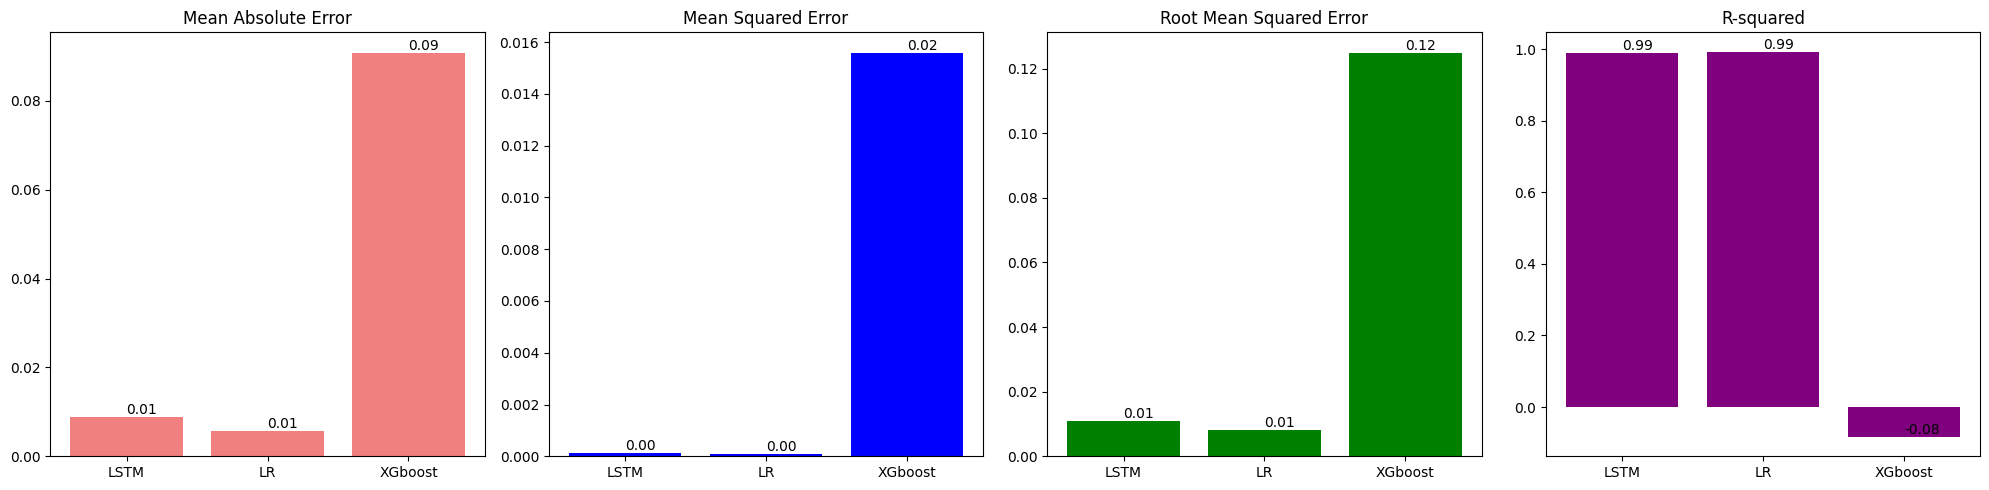

In [43]:
import matplotlib.pyplot as plt



# # Giá trị R2 chạy từ 0 đến 1, càng gần 1 càng tốt
# # Các độ đo còn lại chạy từ 0 đến vô cùng, càng bé càng tốt

mae_lstm, mae_lr, mae = 0.0089, 0.0058, 0.0909
mse_lstm, mse_lr, mse = 0.00013, 0.000075, 0.0156
rmse_lstm, rmse_lr, rmse = 0.011, 0.008, 0.1250
r2_lstm, r2_lr, r2 = 0.990, 0.994, -0.0839



models = ['LSTM', 'LR', 'XGboost']
mae_scores = [mae_lstm, mae_lr, mae]
mse_scores = [mse_lstm, mse_lr, mse]
rmse_scores = [rmse_lstm, rmse_lr, rmse]
r2_scores = [r2_lstm, r2_lr, r2]

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
bars = plt.bar(models, mae_scores, color='lightcoral')
plt.title('Mean Absolute Error')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # thêm giá trị vào mỗi cột

plt.subplot(1, 4, 2)
bars = plt.bar(models, mse_scores, color='blue')
plt.title('Mean Squared Error')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # thêm giá trị vào mỗi cột

plt.subplot(1, 4, 3)
bars = plt.bar(models, rmse_scores, color='green')
plt.title('Root Mean Squared Error')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # thêm giá trị vào mỗi cột

plt.subplot(1, 4, 4)
bars = plt.bar(models, r2_scores, color='purple')
plt.title('R-squared')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # thêm giá trị vào mỗi cột

plt.tight_layout()
plt.show()

